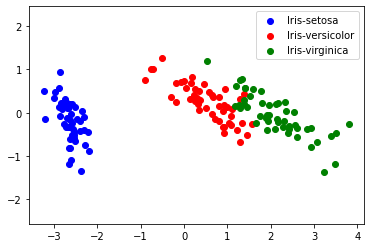

the accuracy is 0.8866666666666667


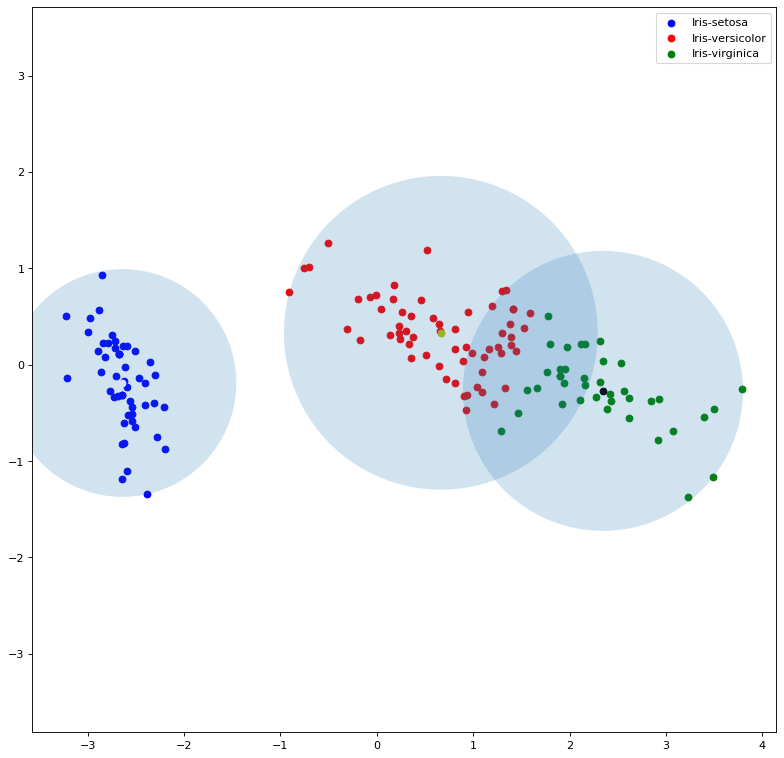

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

iris = pd.read_csv('iris.data', header=None)
train_data = iris.iloc[:,0:-1]
train_target = iris.iloc[:,-1]
def PCA(X,PC):
    mean = X.mean(0)
    A = X-mean
    u,s,vt = np.linalg.svd(A, full_matrices=True)
    return vt

x_y = np.dot(train_data-train_data.mean(0),PCA(train_data,1)[0:2,:].T)
y_number = np.array([], dtype=np.int8)
for i in range(0,len(train_target)):
    if train_target.unique()[0]==train_target[i]:
        setosa = plt.scatter(x_y[i,0],x_y[i,1],c='b')
        y_number = np.append(y_number,2)
    if train_target.unique()[1]==train_target[i]:
        versicolor = plt.scatter(x_y[i,0],x_y[i,1],c='r')
        y_number = np.append(y_number,0)
    if train_target.unique()[2]==train_target[i]:
        virginica = plt.scatter(x_y[i,0],x_y[i,1],c='g')
        y_number = np.append(y_number,1)
plt.axis('equal')
plt.legend((setosa,versicolor,virginica),(train_target.unique()))
plt.show()
from sklearn.cluster import KMeans
from matplotlib.patches import Circle
from sklearn import metrics

kmean_initial = KMeans(n_clusters=3).fit(x_y)
label = kmean_initial.labels_
relabel = label.copy()
centers = kmean_initial.cluster_centers_
recenters = centers.copy()
center_ordered = np.argsort(np.argsort(np.linalg.norm(centers,axis=1)))

for i in range(len(label)):
    for j in range(3):
        if center_ordered[j]!=j:
            if label[i]==j:
                relabel[i]=center_ordered[j]
for i in range(3):
    if center_ordered[i]!=i:
        recenters[center_ordered[i]]=centers[i]
plt.figure(figsize=(12, 12), dpi=80)
for i in range(len(label)):
    if relabel[i] == 0:
        versicolor = plt.scatter(x_y[i,0],x_y[i,1],c='r')
    if relabel[i] == 1:
        virginica = plt.scatter(x_y[i,0],x_y[i,1],c='g')
    if relabel[i] == 2:
        setosa = plt.scatter(x_y[i,0],x_y[i,1],c='b')
def getRadius(center,j):
    radius =0
    for i in range(len(relabel)):
        if j==relabel[i]:
            r = np.linalg.norm(x_y[i]-center)
            if r>=radius:
                radius = r
    return radius
ax = plt.scatter(recenters[0,0],recenters[0,1],c='y')
ax = plt.scatter(recenters[1,0],recenters[1,1],c='k')
ax = plt.scatter(recenters[2,0],recenters[2,1],c='w')
ax = plt.axis('equal')
ax = plt.gca()
for i in range(len(recenters[:,0])):
    ax.add_patch(Circle(recenters[i,:],radius=getRadius(recenters[i,:],i), alpha=1/5))

score = 0
for i in range(len(y_number)):
    if y_number[i] == relabel[i]:
        score+=1

print('the accuracy is',score/len(y_number))

plt.legend((setosa,versicolor,virginica),(train_target.unique()))
plt.show()


	phi: 0.3125719543544966
	mu_0: [0.51581429 0.22430507]
	mu_1: [ 2.03067469 -0.0186527 ]
	sigma_0: [[ 0.36747792 -0.21763482]
 [-0.21763482  0.18751668]]
	sigma_1: [[ 0.55884801 -0.29314396]
 [-0.29314396  0.23296818]]
total steps:  20


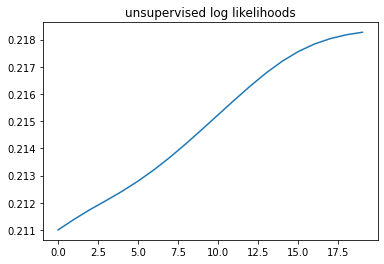

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
(150, 2)
0.98


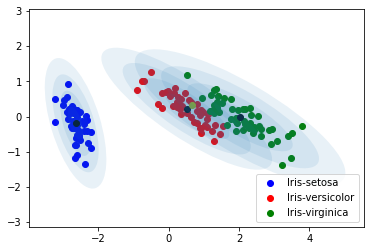

[0.51581429 0.22430507]
[ 2.03067469 -0.0186527 ]
[-2.64084076 -0.19051995]


In [2]:
from scipy.special import logsumexp
from scipy.stats import multivariate_normal
from matplotlib.patches import Ellipse
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    U, s, Vt = np.linalg.svd(covariance)
    angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
    width, height = 2 * np.sqrt(s)

    # Draw the Ellipse
    for nsig in range(1, 5):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))
def initialize_random_params():
    params = {'pi0': x_y[relabel==0].shape[0]/x_y.shape[0],
              'pi1': x_y[relabel==1].shape[0]/x_y.shape[0],
              'pi2': x_y[relabel==2].shape[0]/x_y.shape[0],
              'mu0': recenters[0],
              'mu1': recenters[1],
              'mu2': recenters[2],
              'sigma0': np.cov(x_y[relabel == 0].T, bias= True),
              'sigma1': np.cov(x_y[relabel == 1].T, bias= True),
              'sigma2': np.cov(x_y[relabel == 2].T, bias= True)}
    return params
def e_step(x,params):
    pdf0 = multivariate_normal(params["mu0"], params["sigma0"]).pdf(x)*params["pi0"]
    pdf1 = multivariate_normal(params["mu1"], params["sigma1"]).pdf(x)*params["pi1"]
    pdf2 = multivariate_normal(params["mu2"], params["sigma2"]).pdf(x)*params["pi2"]
    pdf = np.array([pdf0,pdf1,pdf2])
    norm = np.sum(pdf,axis=0)
    return norm,np.divide(pdf,norm).T
"""def e_step(x, params):
    np.log([multivariate_normal(params["mu0"], params["sigma0"]).pdf(x),
            multivariate_normal(params["mu1"], params["sigma1"]).pdf(x),
            multivariate_normal(params["mu2"], params["sigma2"]).pdf(x)])
    log_p_y_x = np.log([params["pi0"], params["pi1"], params["pi2"]])[np.newaxis, ...] + \
                np.log([multivariate_normal(params["mu0"], params["sigma0"]).pdf(x),
                        multivariate_normal(params["mu1"], params["sigma1"]).pdf(x),
                        multivariate_normal(params["mu2"], params["sigma2"]).pdf(x)]).T
    log_p_y_x_norm = logsumexp(log_p_y_x, axis=1)
    return log_p_y_x_norm, np.exp(log_p_y_x - log_p_y_x_norm[..., np.newaxis])"""

def m_step(x, params):
    n = x.shape[0]
    _, r = e_step(x, params)
    pi = np.array([])
    for i in range(3):
        pi = np.append(pi,np.sum(r[:,i])/n)
    mu0 = (r[:, 0].T.dot(x)/np.sum(r[:, 0]))
    mu1 = (r[:, 1].T.dot(x)/np.sum(r[:, 1]))
    mu2 = (r[:, 2].T.dot(x)/np.sum(r[:, 2]))
    sigma0 = (x - mu0).T.dot((x - mu0) * r[:, 0][:, np.newaxis]) / np.sum(r[:, 0])
    sigma1 = (x - mu1).T.dot((x - mu1) * r[:, 1][:, np.newaxis]) / np.sum(r[:, 1])
    sigma2 = (x - mu2).T.dot((x - mu2) * r[:, 2][:, np.newaxis]) / np.sum(r[:, 2])
    params = {'pi0':pi[0],'pi1':pi[1],'pi2':pi[2],'mu0':mu0,'mu1':mu1,'mu2':mu2,'sigma0':sigma0,'sigma1':sigma1,\
              'sigma2':sigma2}
    return params

"""def m_step(x, params):
    number_of_data = x.shape[0]
    _, r = e_step(x, params)
    pi = np.array([])
    mu = np.array([])
    sigma = np.array([np.cov(x_y[relabel == 0].T),np.cov(x_y[relabel == 0].T),np.cov(x_y[relabel == 0].T)])
    for i in range(3):
        ri = r[:,i]
        sum_ri = np.sum(ri)
        pi = np.append(pi,sum_ri/number_of_data)
        mu = np.append(mu,(ri[..., np.newaxis].T.dot(x)/sum_ri).flatten())
    diff0 = x - mu[0:2]
    sigma0 = diff0.T.dot(diff0 * r[:,0][..., np.newaxis]) / np.sum(r[:,0])
    diff1 = x - mu[2:4]
    sigma1 = diff1.T.dot(diff1 * r[:,1][..., np.newaxis]) / np.sum(r[:,1])
    diff2 = x - mu[4:6]
    sigma2 = diff2.T.dot(diff2 * r[:,2][..., np.newaxis]) / np.sum(r[:,2])
    params = {'pi0':pi[0],'pi1':pi[1],'pi2':pi[2],'mu0':mu[0:2],'mu1':mu[2:4],'mu2':mu[4:6],'sigma0':sigma[0],
              'sigma1':sigma[1],'sigma2':sigma[2]}
    print(params['sigma1'])
    print(params['mu1'])
    return params"""
def get_avg_log_likelihood(x, params):
    loglikelihood, _ = e_step(x, params)
    return np.mean(loglikelihood)


def run_em(x, params):
    avg_loglikelihoods = []
    while True:
        avg_loglikelihood = get_avg_log_likelihood(x, params)
        avg_loglikelihoods.append(avg_loglikelihood)
        if len(avg_loglikelihoods) > 2 and abs(avg_loglikelihoods[-1] - avg_loglikelihoods[-2]) < 0.0001:
            break
        params = m_step(x_y, params)
    print("\tphi: %s\n\tmu_0: %s\n\tmu_1: %s\n\tsigma_0: %s\n\tsigma_1: %s"
               % (params['pi0'], params['mu0'], params['mu1'], params['sigma0'], params['sigma1']))
    _, posterior = e_step(x_y, params)
    forecasts = np.argmax(posterior, axis=1)
    return forecasts, posterior, avg_loglikelihoods,params
random_params = initialize_random_params()
unsupervised_forecastsforecasts, unsupervised_posterior, unsupervised_loglikelihoods,params = run_em(x_y, random_params)
print("total steps: ", len(unsupervised_loglikelihoods))
plt.plot(unsupervised_loglikelihoods)
plt.title("unsupervised log likelihoods")
plt.show()
#mine
predicted = np.array([], dtype=np.int8)
for i in range(unsupervised_posterior.shape[0]):
    index = np.argmax(unsupervised_posterior[i])
    if index ==0:
        reshuffle = 2
    if index ==1:
        reshuffle =0
    if index ==2:
        reshuffle =1
    predicted = np.append(predicted,index)
print(predicted)
print(y_number)
print(x_y.shape)
score = 0
for i in range(len(y_number)):
    if y_number[i] == predicted[i]:
        score+=1
print(score/150)
for i in range(len(predicted)):
    if predicted[i] == 0:
        versicolor = plt.scatter(x_y[i,0],x_y[i,1],c='r')
    if predicted[i] == 1:
        virginica = plt.scatter(x_y[i,0],x_y[i,1],c='g')
    if predicted[i] == 2:
        setosa = plt.scatter(x_y[i,0],x_y[i,1],c='b')
params2 = initialize_random_params()
elipse_centers = np.array([params['mu0'],params['mu1'],params['mu2']])
covariance = np.array([params['sigma0'],params['sigma1'],params['sigma2']])
bx = plt.scatter(elipse_centers[:,0],elipse_centers[:,1],c='k')
bx = plt.axis('equal')
bx = plt.scatter(recenters[0,0],recenters[0,1],c='y')
bx = plt.gca()
for i in range(0,3):
    draw_ellipse(elipse_centers[i],covariance[i],alpha=1/10)
    
plt.legend((setosa,versicolor,virginica),(train_target.unique()))
plt.show()
print(params['mu0'])
print(params['mu1'])
print(params['mu2'])
